In [ ]:
import os
import time
import sys
import json
import numpy as np
import torch as th
import matplotlib.pyplot as plt
import motornet as mn
from simple_policy import Policy
from simple_task import CentreOutFF
from simple_utils import *

print('All packages imported.')
print('pytorch version: ' + th.__version__)
print('numpy version: ' + np.__version__)
print('motornet version: ' + mn.__version__)

In [ ]:
model_name = "simple0/simple0"

In [ ]:
# PLOT LOSS FUNCTION(s)

log = json.load(open(model_name + "_log.json",'r'))
print(log["losses"].keys())
w=10
for loss in log["losses"].keys():
    fig,ax = plot_training_log(log=log["losses"],loss_type=loss, w=w)
    ax.set_title(f"{loss} (w={w})")


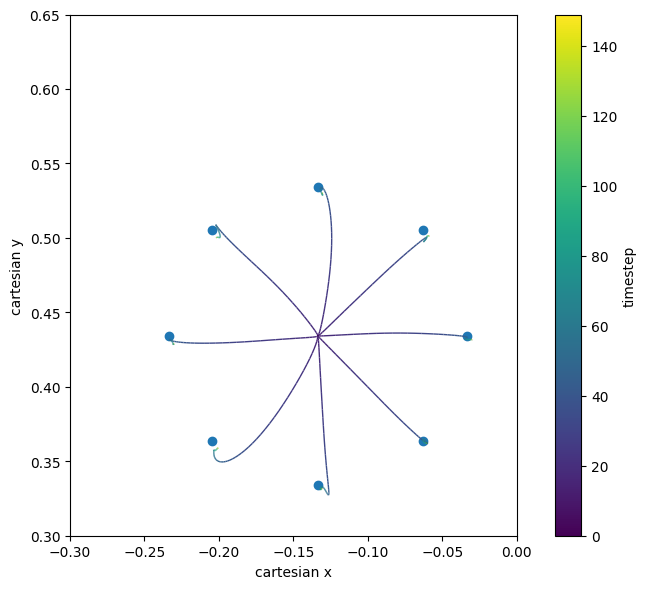

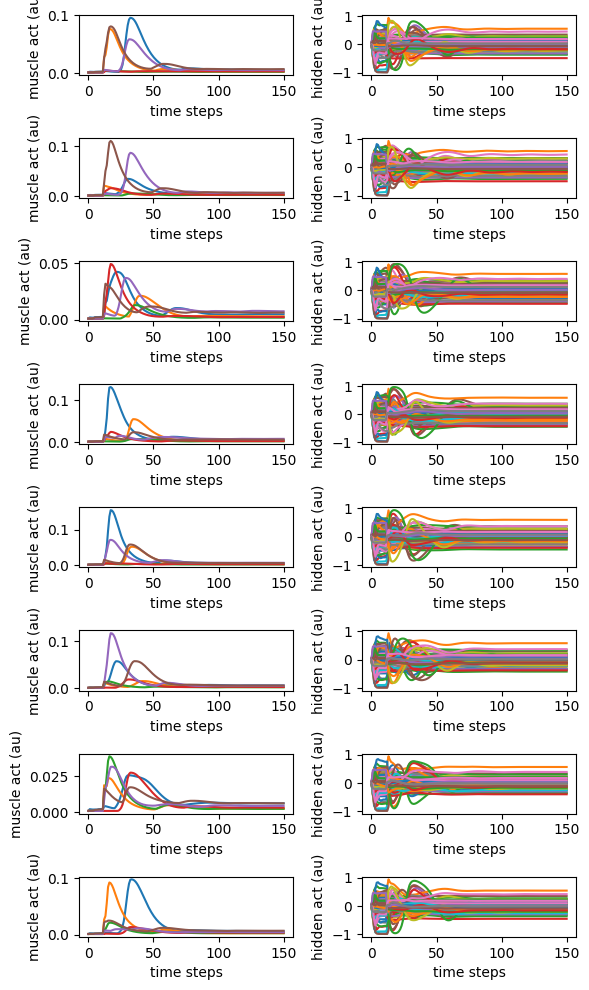

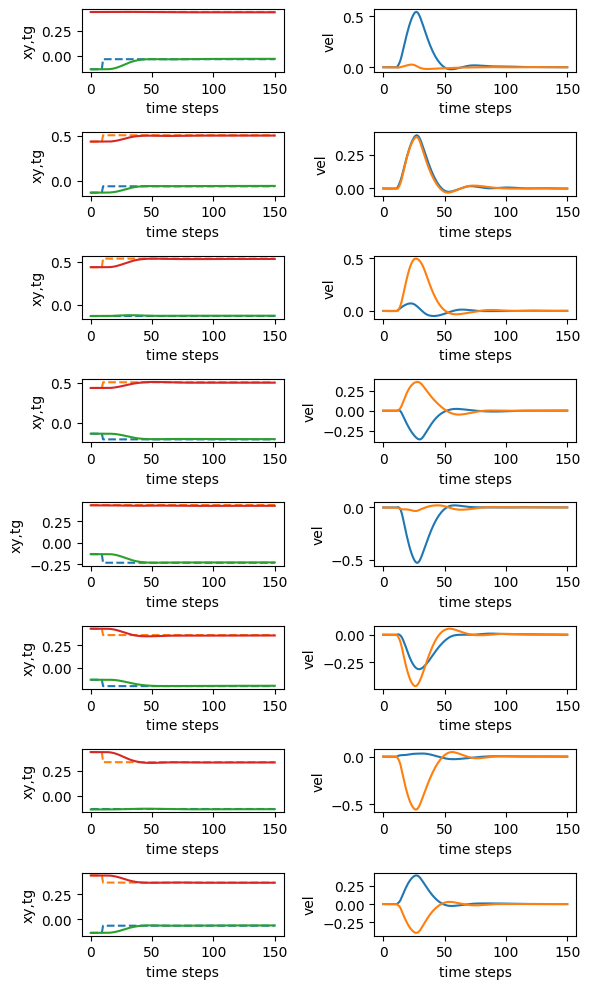

In [53]:
# TEST NETWORK ON CENTRE-OUT

data, losses = test(model_name + "_cfg.json", model_name + "_weights")

fig, ax = plot_simulations(xy=data['xy'], target_xy=data['tg'], figsize=(8,6))
fig, ax = plot_activation(data['all_hidden'], data['all_muscle'])
fig, ax = plot_kinematics(all_xy=data["xy"], all_tg=data["tg"], all_vel=data["vel"])

In [ ]:
losses

In [49]:
emg = np.array(data['all_muscle'])
print(f"emg shape: {np.shape(emg)}")
emg_max = np.max(emg, axis=(0,1))
print(f"emg max:   {emg_max}")

emg shape: (8, 150, 6)
emg max:   [0.15590355 0.09280028 0.03908966 0.04919166 0.11706387 0.1107692 ]


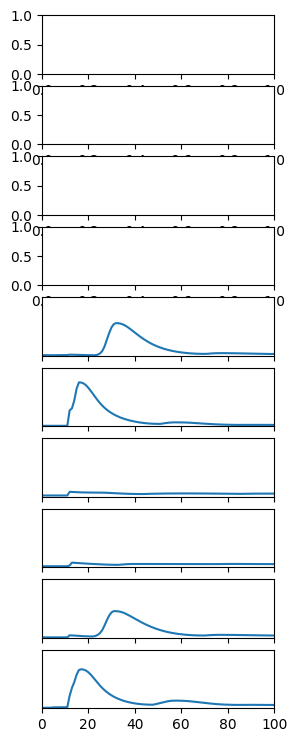

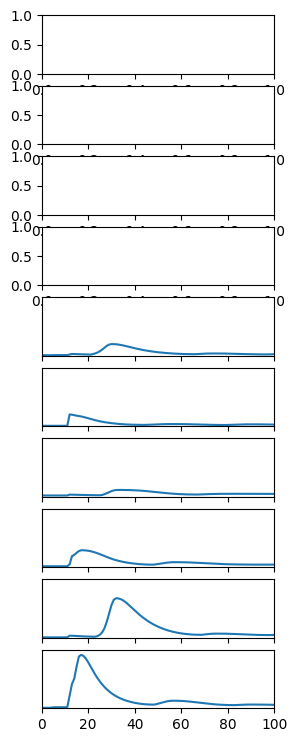

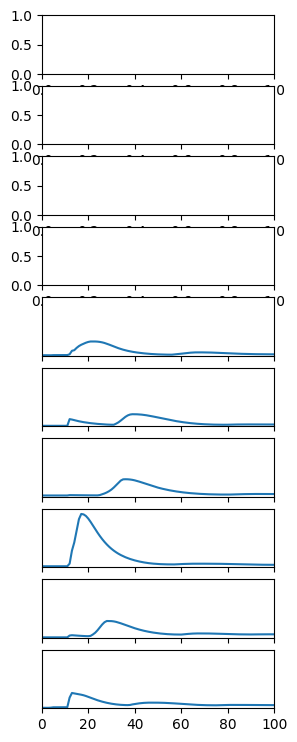

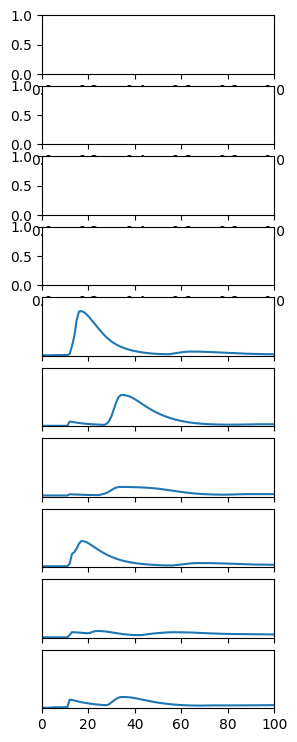

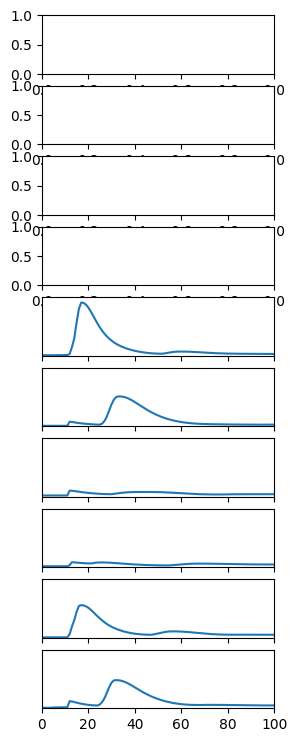

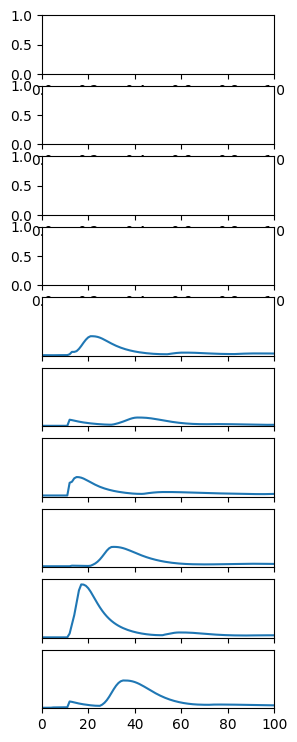

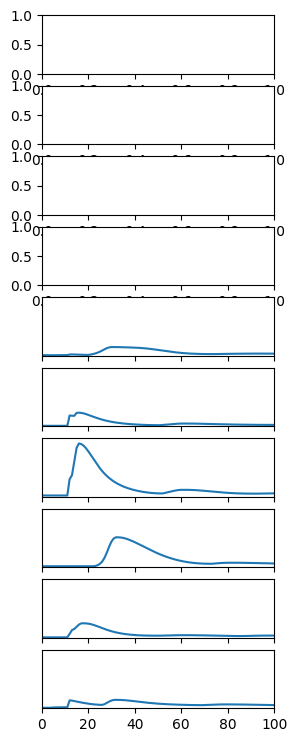

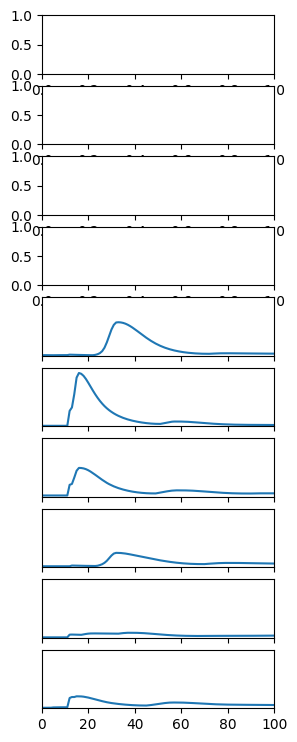

In [79]:
for i in range(8): # tgt directions
    fig,ax = plt.subplots(10,1)
    fig.set_size_inches(3,9)
    for j in range(6): # muscles
        ax[j+4].plot(emg[i,:,j]/emg_max[j])
        ax[j+4].set_ylim((0,1.1))
        ax[j+4].set_yticks([])
        ax[j+4].set_yticklabels([])
        ax[j+4].set_xlim((0,100))
        ax[j+4].set_xticks([])
        ax[j+4].set_xticklabels([])
    ax[9].set_xticks(range(0,120,20))
    ax[9].set_xticklabels(range(0,120,20))
    plt.show()